In [2]:
import os
import shutil

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
def text_to_df(text_file):
    
    """Function receives text file(string) as input, and will select image.png name, status code, and target name, and return a pandas DataFrame object"""
    
    text_object = open(text_file)
    
    words_text = text_object.readlines()
    
    comma_separated = []
    #split text values into comma separated values
    
    for x in words_text: 
        comma_separated.append(x.split())
    
    images = []
    targets = []
    status_code = []

    for target in comma_separated:
        images.append(target[0])
        status_code.append(target[1])
        targets.append(target[-1])
        
    img_array = np.array(images)
    target_array = np.array(targets)
    status_array = np.array(status_code)
    
    img_series = pd.Series(img_array)
    target_series = pd.Series(target_array)
    status_series = pd.Series(status_array)
    
    img_df = pd.DataFrame(img_series)
    target_df = pd.DataFrame(target_series)
    status_df = pd.DataFrame(status_series)
    
    df_1 = img_df.merge(status_df, left_index=True, right_index=True)
    df = df_1.merge(target_df, left_index = True, right_index = True)
    
    df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)
    
    return df

In [73]:
#read text files as dataframes

df = text_to_df('words.txt')
df_train = text_to_df('train.txt')
df_validate1 = text_to_df('validate1.txt')
df_validate2 = text_to_df('validate2.txt')
df_test = text_to_df('test.txt')

In [222]:
df

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.
...,...,...,...
115315,r06-143-04-06,ok,him
115316,r06-143-04-07,ok,in
115317,r06-143-04-08,ok,the
115318,r06-143-04-09,ok,garden


In [30]:
def remove_err(df):
    df.drop(df[df['status_code'] == 'err'].index, inplace = True)
   

In [75]:
#remove known error columns marked as 'err' from all datasets
remove_err(df)
remove_err(df_train)
remove_err(df_validate1)
remove_err(df_validate2)
remove_err(df_test)

In [77]:
df_train.shape

(33419, 3)

In [33]:
df.shape

(96456, 3)

In [78]:
def get_unique_targets(df):
    unique_df = pd.DataFrame(df['target'].value_counts())
    reset_df = unique_df.reset_index()
    reset_df.rename(columns = {'index': 'word', 'target': 'count'}, inplace = True)
    return reset_df
  
    

In [79]:
full_unique = get_unique_targets(df)
train_unique = get_unique_targets(df_train)
val1_unique = get_unique_targets(df_validate1)
val2_unique = get_unique_targets(df_validate2)
test_unique = get_unique_targets(df_test)

In [80]:
train_unique.head(50)

,word,count
0,the,1876
1,.,1412
2,",",1298
3,of,992
4,to,846
5,and,657
6,a,652
7,in,594
8,is,455
9,"""",428


In [12]:
test_unique.head(40)

,word,count
0,the,274
1,",",214
2,of,156
3,and,137
4,.,128
5,a,107
6,to,94
7,was,83
8,in,82
9,had,37


In [13]:
train_unique.head(100)

,word,count
0,the,1876
1,.,1412
2,",",1298
3,of,992
4,to,846
5,and,657
6,a,652
7,in,594
8,is,455
9,"""",428


In [40]:
def get_word_pngs(word, df):
    new_df = df[df['target'] == word]
    
    return new_df

In [44]:
of = get_word_pngs('of', df)

In [52]:
of.shape

(2741, 3)

In [15]:
the.head()

,image,status_code,target
34,a01-000u-04-05,ok,the
86,a01-000x-03-07,ok,the
123,a01-003-02-02,ok,the
137,a01-003-04-01,ok,the
158,a01-003-07-01,ok,the


In [114]:
def word_to_folder(word, df, folder):
    """
    """
    
    new_df = df[df['target'] == word]
    
    the_directories = list(new_df['image'] + '.png')
    full_path = []
    
    for root, dirs, files in os.walk('test'):
        for name in files:
            if name in the_directories:
                full_path.append(os.path.join(root, name))
                
    split_directories = []
    
    for lists in full_path:
        split_directories.append(lists.split('/'))
        
    indexed_png = []
    
    for img in split_directories:
        indexed_png.append(img[3])
        
    i=0
    for x in full_path:
        shutil.move('../text-recognition/'+f'{x}', '../text-recognition/'+folder+'/'+word+'/'+f'{indexed_png[i]}')
        i+=1
        


In [105]:
train_unique.head(80)

,word,count
0,the,1876
1,.,1412
2,",",1298
3,of,992
4,to,846
5,and,657
6,a,652
7,in,594
8,is,455
9,"""",428


In [158]:
target_words = ['the', 'of', 'has', 'to','are', 'on', 'by', 'and', 'be', 'it', 'a',
                'for', 'not', 'in', 'with', 'his', 'is', 'was', 'that', 'which',
                'have', 'from', 'at', 'an', 'had', 'will', 'would', 'this', 'their',
                'who', 'were', 'been', 'her', 'all', 'or', 'more', 'said', 'no', 'than',
                'them', 'should', 'so', 'But', 'out', 'one', 'Sir',
                'into', 'our', 'there', 'last', 'can', 'only', 'talks', 'people', 'made', 'when']


In [94]:
#word_to_folder('a', df_train, 'new_train')

In [96]:
def all_words_to_folders(list_of_words, df, folder):
    for word in list_of_words:
        word_to_folder(word, df, folder)
        

In [115]:
all_words_to_folders(target_words, df_test, 'new_test')

In [54]:
len(full_path)

2741

In [55]:
split_directories = []
for lists in full_path:
    split_directories.append(lists.split('/'))

In [56]:
split_directories[3][3]

'e04-127-03-06.png'

In [57]:
indexed_png = []
for img in split_directories:
    indexed_png.append(img[3])

In [58]:
full_path[3]

'2_words/e04/e04-127/e04-127-03-06.png'

In [59]:
indexed_png[3]

'e04-127-03-06.png'

## Check DataFrames to ensure all classified words are contained and labeled properly

In [116]:
df_train.shape

(33419, 3)

In [117]:
df_validate1.shape

(5682, 3)

In [118]:
df_validate2.shape

(5730, 3)

In [182]:
testdf_train = target_worder(target_words, df_train)

In [192]:
testdf_train.reset_index(inplace = True)

In [203]:
#uniquetrain = get_unique_targets(testdf_train)

In [227]:
unique_full = get_unique_targets(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129e4ba90>]],
      dtype=object)

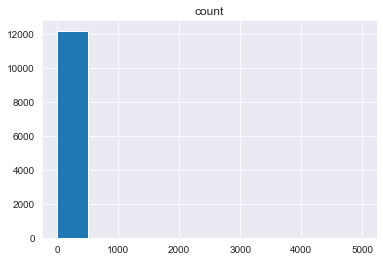

In [229]:
unique_full.hist()

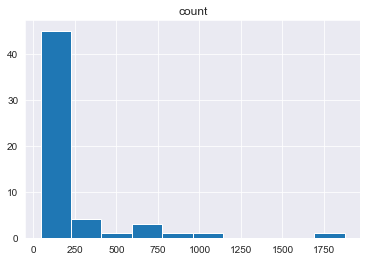

In [225]:
sns.set_style('darkgrid')
uniquetrain.hist()
plt.show()

In [226]:
.shape

(56, 2)

In [187]:
testdf_validate1.shape

(1981, 3)

In [188]:
testdf_validate2.shape

(2037, 3)

In [190]:
testdf_test = target_worder(target_words,df_test)  

In [191]:
testdf_test.shape

(1443, 3)

In [166]:
word_df_list[0]

,image,status_code,target
48,g01-000-05-01,ok,the
70,g01-000-07-04,ok,the
87,g01-004-00-08,ok,the
119,g01-004-04-02,ok,the
137,g01-008-00-02,ok,the
188,g01-008-05-00,ok,the
197,g01-008-06-01,ok,the
208,g01-008-07-04,ok,the
217,g01-008-08-03,ok,the
237,g01-012-01-04,ok,the


In [159]:
len(target_words)

56

In [213]:
#iterate through list of image file words
#filter out img files that have been moved to directories for classification
#keep words mapped to their target

def target_worder(word_list, df):
    word_df_list = []
    for x in word_list:
        new_df = df[df['target'] == f'{x}']
        word_df_list.append(new_df)
    concat_frames = pd.concat(word_df_list)
    concat_frames.reset_index(inplace = True)
    return concat_frames
 

In [214]:
testdf_train = target_worder(target_words, df_train)
testdf_validate1 = target_worder(target_words,df_validate1)
testdf_validate2 = target_worder(target_words,df_validate2)
testdf_test = target_worder(target_words, df_test)

## Check shape of dataframes and preview values to ensure values have been properly obtained

In [216]:
testdf_train.shape

(11295, 4)

In [217]:
testdf_validate1.shape

(1981, 4)

In [218]:
testdf_validate2.shape

(2037, 4)

In [219]:
testdf_test.shape

(1443, 4)

## Write new dataframes to disk as csv's

In [221]:
testdf_train.to_csv('train.csv', index = False)
testdf_validate1.to_csv('validate1.csv', index = False)
testdf_validate2.to_csv('validate2.csv', index = False)
testdf_test.to_csv('test.csv', index = False)